In [13]:
from preclustering import PreClustering
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

X,df = PreClustering.main()

loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


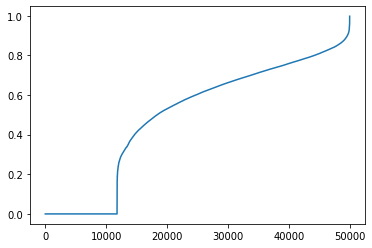

In [16]:
neigh = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

0.8394169258073175


<Figure size 360x360 with 0 Axes>

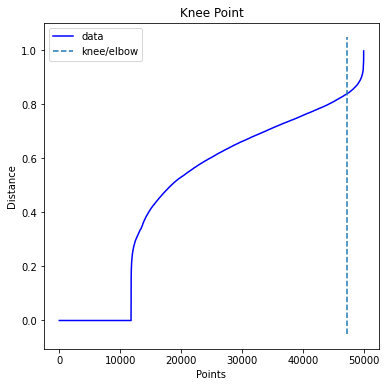

In [22]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [23]:
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)
silhouette_scores_data=pd.DataFrame()
for min_sample_trial in min_sample_list:
    db = DBSCAN(eps=0.8, min_samples=min_sample_trial)
    if len(np.unique(db.fit_predict(X))):
        sil_score=silhouette_score(X, db.fit_predict(X))
    else:
        continue
    trial_parameters=" min_sample :" + str(min_sample_trial)
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

/tmp/ipykernel_16476/3970233292.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_16476/3970233292.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_16476/3970233292.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))


,score,parameters
0,-0.23203,min_sample :3


In [40]:
DBS_clf = DBSCAN(eps=0.9, min_samples=3)
DBS_clf.fit(X)
print(DBS_clf.labels_)

[0 0 0 ... 0 0 0]


In [39]:
labels=DBS_clf.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(DBS_clf.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 373
